<a href="https://colab.research.google.com/github/eliasalemann/UNI/blob/main/EX2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**OBJETIVO**:

Identificar el tipo de panaderia (tipo 1 o tipo 0) basado en la cantidad de los ingredientes dados (clasificacion). Se utilizara la libreria 'Pycaret'


**RESULTADOS:**
1.   El modelo actual permite identificar el tipo de panaderia con una precision del 100, basado en una muestra de 80 observaciones de entrenamiento y 20 muestras de prueba
2.   Los ingredientes mas importantes para identificar las panaderias de tipo 1 son la harina (menores cantidades, mayor probabilidad), azucar y huevos (mayores cantidades, mayor probabilidad) 

A. Lectura de datos

In [ ]:
#Instalando Pycaret
=#!pip install pycaret

#Importando Pandas
import pandas as pd
 
#Web link
link = "https://raw.githubusercontent.com/eliasalemann/UNI/main/data/pastry.csv"
 
#Leyendo archivo csv
df = pd.read_csv(link)

B. Analisis exploratorio




1.   La base de datos contiene 100 recetas de dos distintos tipos de panaderia (Tipo 0 y tipo 1)
2.   Los rangos de las variables parecen correctos, excepto la variable 'Salt' que tiene varianza 0, esta variable se borrara eventualmente.



In [ ]:
#Distribucion de los tipos de panaderia
df.groupby('Type').count()

,Flour,Milk,Sugar,Butter,Egg,Baking Powder,Vanilla,Salt
Type,,,,,,,,
0,50,50,50,50,50,50,50,50
1,50,50,50,50,50,50,50,50


In [ ]:
#Rango de los datos
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Type,100.0,0.50,0.502519,0.0,0.00,0.5,1.00,1.0
Flour,100.0,44.30,6.982663,33.0,38.00,42.5,50.00,59.0
Milk,100.0,18.51,6.780088,0.0,13.75,17.0,24.00,37.0
Sugar,100.0,17.72,7.488820,0.0,12.00,19.0,23.00,36.0
Butter,100.0,11.43,5.152728,1.0,8.00,10.0,15.25,27.0
Egg,100.0,6.90,3.157483,0.0,5.00,6.0,9.00,16.0
Baking Powder,100.0,1.34,0.699495,0.0,1.00,1.0,2.00,3.0
Vanilla,100.0,0.56,0.537860,0.0,0.00,1.0,1.00,2.0
Salt,100.0,0.00,0.000000,0.0,0.00,0.0,0.00,0.0




3.   No hay valores nulos, ni duplicados y el tipo de datos es aceptable (todas las variables son numericas)




In [ ]:
#Tipos de datos
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype
---  ------         --------------  -----
 0   Type           100 non-null    int64
 1   Flour          100 non-null    int64
 2   Milk           100 non-null    int64
 3   Sugar          100 non-null    int64
 4   Butter         100 non-null    int64
 5   Egg            100 non-null    int64
 6   Baking Powder  100 non-null    int64
 7   Vanilla        100 non-null    int64
 8   Salt           100 non-null    int64
dtypes: int64(9)
memory usage: 7.2 KB


In [ ]:
#Valores nulos
df.isnull().sum()

Type             0
Flour            0
Milk             0
Sugar            0
Butter           0
Egg              0
Baking Powder    0
Vanilla          0
Salt             0
dtype: int64

In [ ]:
#Valores duplicados
df.duplicated().sum()

0

4.   Basado en el analis numerico y grafico de correlaciones: 
*   El tipo de panaderia 1 contiene mayores cantidades de azucar (Sugar), 'Mantequilla' (Butter) y Huevos (Egg) que el tipo 0 (correlaciones varian de moderadas a muy altas)
*   El tipo de panaderia 1 continene menores cantidades de harina (Flour) y leche (Milk) que el tipo 0 (correlaciones varian de moderadas a muy altas)





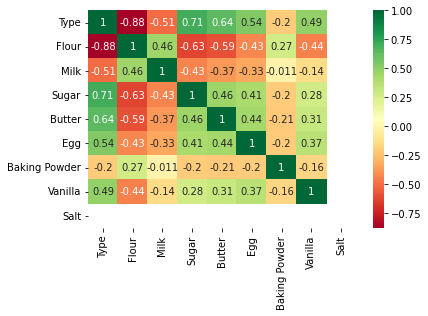

In [ ]:
##Analisis correlacional numerico
import seaborn as sb
sb.heatmap(df.corr(), annot=df.corr(), cmap = 'RdYlGn')

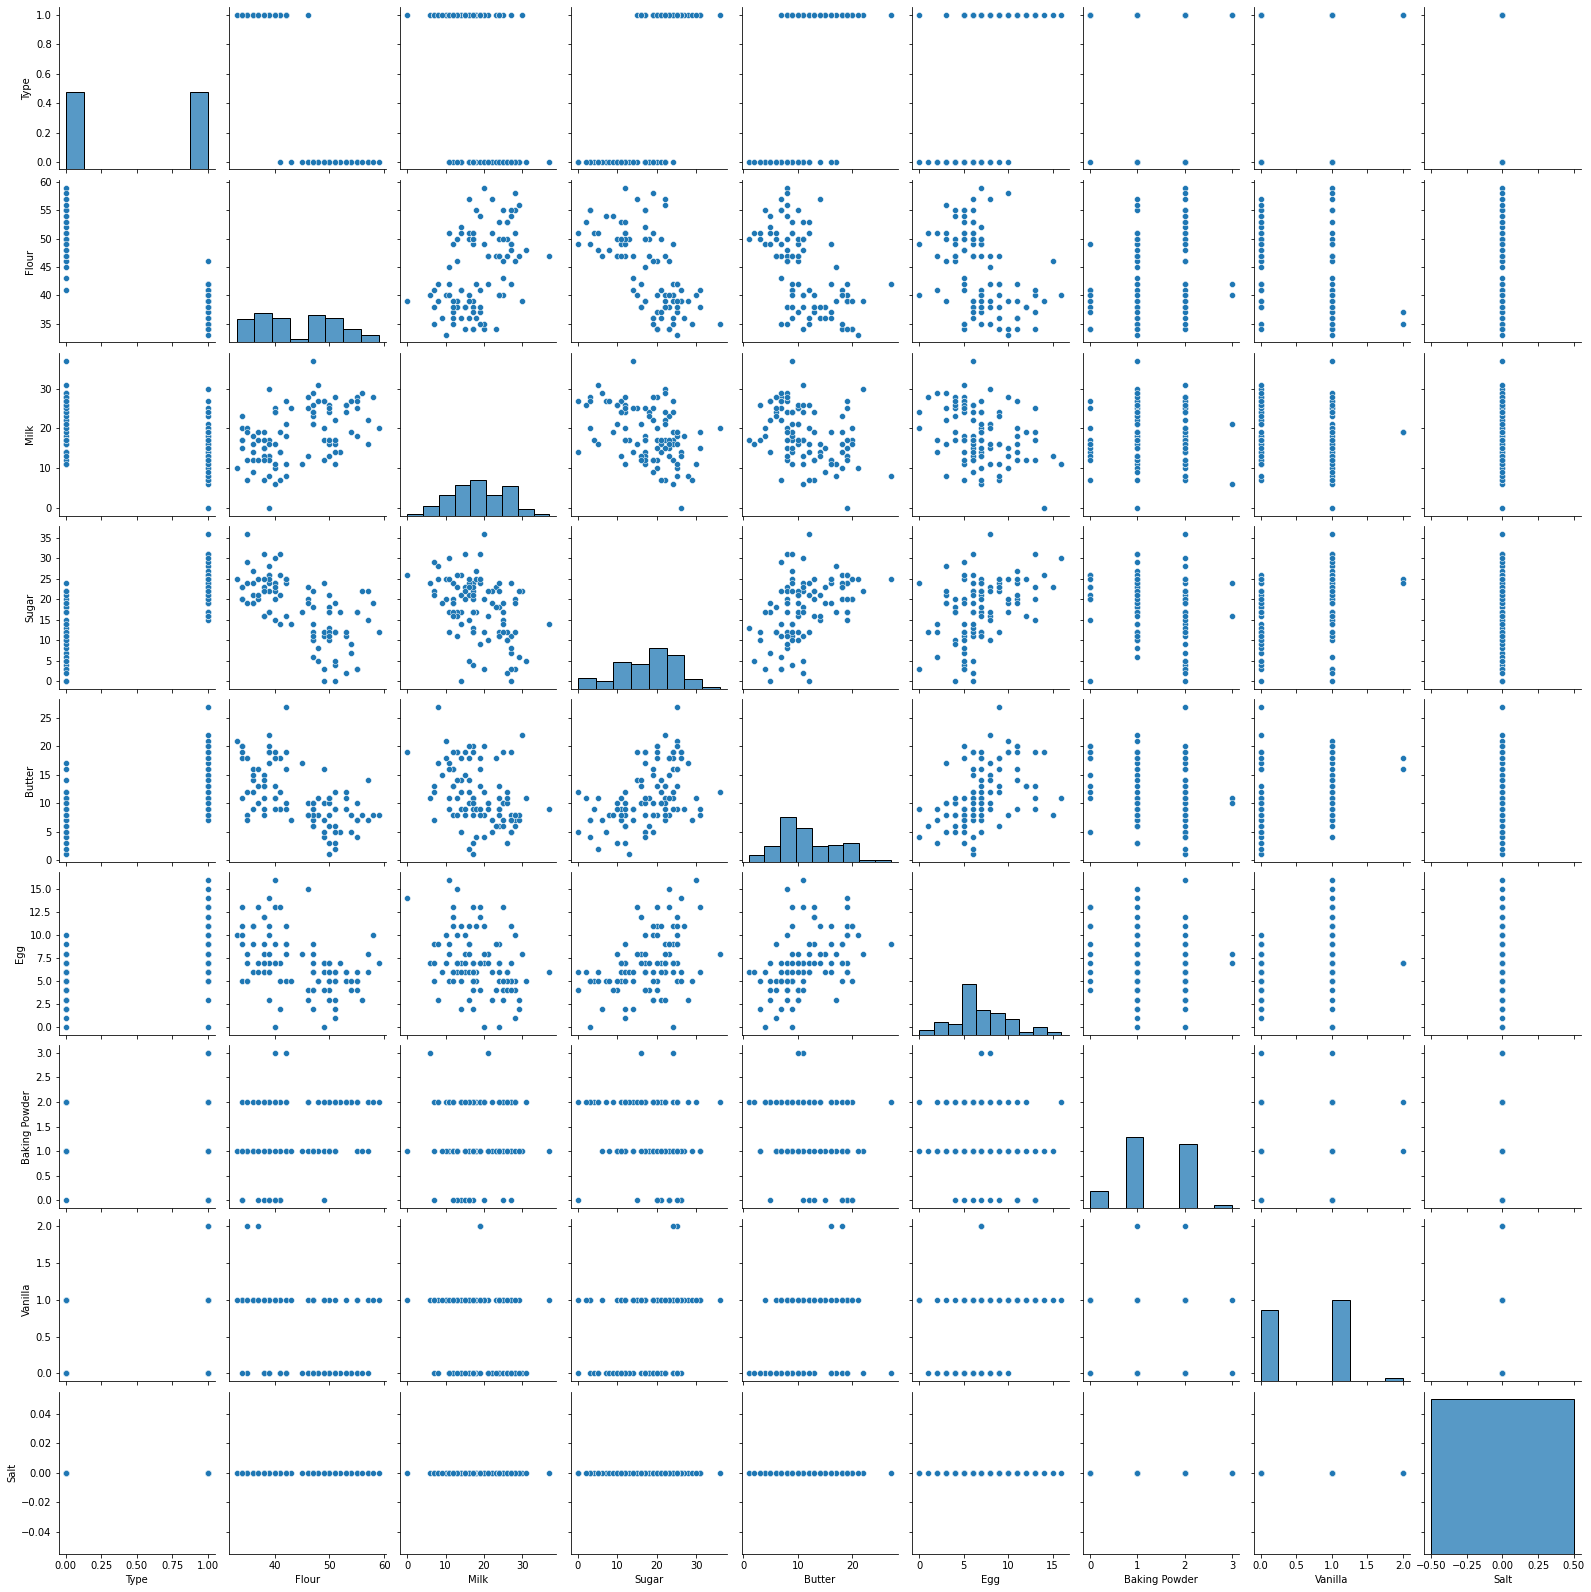

In [ ]:
#Analisis correlacional grafico
sb.pairplot(df)

C. Modelado de datos


In [ ]:
#Importando la libreria de clasificacion
from pycaret.classification import *

#Definicion del modelo
set_up = setup(data,
      target = 'Type',
      ignore_features = ['Salt'],  #Se elimina por la falta de varianza
      numeric_features = ['Egg'],  #Se modelara como una variable continua
      categorical_features = [],
      train_size = .8,             #Se usara el 80% de los datos para escojer el mejor algoritmo
      normalize = False,
      silent = True)

#Escogiendo el mejor algoritmo y ajustando los hiper-parametros
mejor = compare_models(fold = 5)

modelo_final_noajustado = create_model(mejor, fold = 5)

modelo_final_ajustado = tune_model(modelo_final_noajustado, fold = 5)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,1.000,1.0,1.00,1.0,1.0000,1.00,1.0000
1,0.875,1.0,0.75,1.0,0.8571,0.75,0.7746
2,1.000,1.0,1.00,1.0,1.0000,1.00,1.0000
3,1.000,1.0,1.00,1.0,1.0000,1.00,1.0000
4,1.000,1.0,1.00,1.0,1.0000,1.00,1.0000
Mean,0.975,1.0,0.95,1.0,0.9714,0.95,0.9549
SD,0.050,0.0,0.10,0.0,0.0571,0.10,0.0902


El mejor modelo es

In [ ]:
modelo_final_ajustado

LogisticRegression(C=2.257, class_weight={}, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=1000,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=2032, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

D. Resultados




1.   El modelo fue entrenado para identificar el tipo de panaderia basado en 80 recetas (80% de los datos) y logro identificar el tipo correcto de las restantes 20 recetas, sin cometer errores. Una precision muy alta. El desempeno podria cambiar con nuevas observaciones



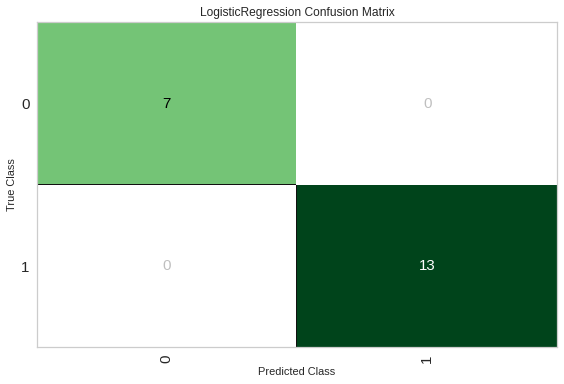

In [ ]:
#Evaluacion del modelo
plot_model(modelo_final_ajustado, plot = 'confusion_matrix')

#Guardando el modelo final para futuras clasificaciones
modelo_final = finalize_model(modelo_final_ajustado)

2.   Los tres ingredientes mas importantes que parecen determinar el tipo 1 de panaderia son

*   Harina (Flour)
*   Huevos (Egg)
*   Azucar  (Sugar)

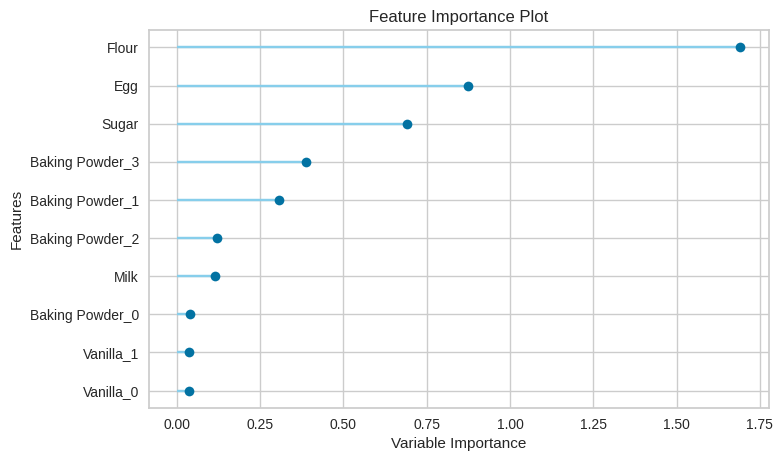

In [ ]:
plot_model(modelo_final, plot = 'feature')



3.   Las panaderias de tipo 1 parecen caracterizarse por su mayor contenido de huevos (Egg) y azucar (Sugar) y por menor contenido de harina (Flour), que las panaderias de tipo 0



In [ ]:
importancia_variables = pd.DataFrame(modelo_final.coef_.T,columns = ['Coeficiente'],
                                     index= set_up[9][1][1].columns.tolist(),)
importancia_variables.sort_values('Coeficiente', ascending=False, key=abs)[0:3]

,Coeficiente
Flour,-1.691906
Egg,0.872520
Sugar,0.691516
